In [23]:
import pandas as pd
from pandas import DataFrame
from typing import Dict, Literal
import os
trainDF = pd.read_csv('train_V2.csv')
testDF = pd.read_csv('test_V2.csv')
trainDF.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [24]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [25]:
trainDF.shape

(4446966, 29)

In [26]:
trainDF.dropna(inplace=True)
print(trainDF.shape)
trainDF.drop(['Id', 'killPoints', 'rankPoints', 'winPoints'],axis=1,inplace=True)
print(trainDF.shape)

(4446965, 29)
(4446965, 25)


In [27]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4446965 entries, 0 to 4446965
Data columns (total 25 columns):
 #   Column           Dtype  
---  ------           -----  
 0   groupId          object 
 1   matchId          object 
 2   assists          int64  
 3   boosts           int64  
 4   damageDealt      float64
 5   DBNOs            int64  
 6   headshotKills    int64  
 7   heals            int64  
 8   killPlace        int64  
 9   kills            int64  
 10  killStreaks      int64  
 11  longestKill      float64
 12  matchDuration    int64  
 13  matchType        object 
 14  maxPlace         int64  
 15  numGroups        int64  
 16  revives          int64  
 17  rideDistance     float64
 18  roadKills        int64  
 19  swimDistance     float64
 20  teamKills        int64  
 21  vehicleDestroys  int64  
 22  walkDistance     float64
 23  weaponsAcquired  int64  
 24  winPlacePerc     float64
dtypes: float64(6), int64(16), object(3)
memory usage: 882.1+ MB


In [28]:
def dataframes_from_id_type(id_type: str, df: DataFrame, df_type: Literal["train", "test"]) -> DataFrame:
    match id_type:
        case "matchId":
            path = "./data_groped_by_{}/{}".format(id_type,df_type)
            if not(os.path.exists(path)):
                os.makedirs(path)
            match_id_list = []
            match_id_list = df.groupby('matchId').agg(list)
            for i in range(match_id_list.shape[0]):
                series = match_id_list.iloc[i]
                if not(os.path.exists("{}/{}".format(path, series.matchType[0]))):
                    os.makedirs("{}/{}".format(path, series.matchType[0]))
                filename = "{}/{}/{}.csv".format(path,series.matchType[0],series.name)
                series.to_csv(filename)
            return match_id_list
        case "groupId":
            return []
    return []

In [29]:
x = dataframes_from_id_type(id_type="matchId", df=trainDF, df_type="train")

In [30]:
print(x.shape)
print(type(x))
print(x.iloc[47963])
print(len(x.iloc[20]['assists']))

(47964, 24)
<class 'pandas.core.frame.DataFrame'>
groupId            [14fdb6c222eff7, 1958cde581220c, 7b02f39a10095...
assists            [1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...
boosts             [0, 2, 1, 0, 1, 0, 0, 1, 3, 0, 0, 0, 1, 1, 0, ...
damageDealt        [37.8, 39.1, 80.74, 0.0, 145.9, 79.0, 28.36, 1...
DBNOs              [0, 0, 0, 1, 1, 0, 0, 1, 4, 0, 1, 0, 1, 6, 0, ...
headshotKills      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...
heals              [0, 3, 1, 1, 1, 0, 0, 8, 1, 0, 0, 0, 3, 2, 0, ...
killPlace          [76, 39, 42, 57, 32, 53, 43, 16, 1, 77, 35, 61...
kills              [0, 0, 0, 0, 1, 0, 0, 2, 6, 0, 1, 0, 2, 5, 0, ...
killStreaks        [0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, ...
longestKill        [0.0, 0.0, 0.0, 0.0, 20.75, 0.0, 0.0, 21.09, 1...
matchDuration      [1863, 1863, 1863, 1863, 1863, 1863, 1863, 186...
matchType          [squad-fpp, squad-fpp, squad-fpp, squad-fpp, s...
maxPlace           [29, 29, 29, 29, 29, 29, 29, 29, 2

In [64]:
from copy import copy
from matplotlib import pyplot as plt

data_grouped_by_game = {
                        "crashfpp": [],
                        "crashtpp": [],
                        "duo": [],
                        "duo-fpp": [],
                        "flarefpp": [],
                        "flaretpp": [],
                        "normal-duo": [],
                        "normal-duo-fpp": [],
                        "normal-solo": [],
                        "normal-solo-fpp": [],
                        "normal-squad": [],
                        "normal-squad-fpp": [],
                        "solo": [],
                        "solo-fpp": [],
                        "squad": [],
                        "squad-fpp": []
                        }

data_to_retrieve = {
                    "matchId": "",
                    "matchDuration": 0,
                    "numPlayers": 0,
                    "numGroups": 0
                    }


for i in range(x.shape[0]):
    game_data = x.iloc[i]
    data_holder = copy(data_to_retrieve)
    data_holder["matchId"] = game_data.name
    data_holder["matchDuration"] = game_data['matchDuration'][0]/60
    data_holder["numGroups"] = game_data["numGroups"][0]
    data_holder["numPlayers"] = len(game_data["assists"])
    data_grouped_by_game[game_data["matchType"][0]].append(data_holder)

def match_type_data_boxplot(grouped_data: Dict,
                            match_type: Literal["crashfpp", "crashtpp", "duo", "duo-fpp", "flarefpp", 
                                                "flaretpp", "normal-duo", "normal-duo-fpp", "normal-solo", "normal-solo-fpp",
                                                "normal-squad", "normal-squad-fpp", "solo", "solo-fpp", "squad", "squad-fpp"],
                            data_to_boxplot: Literal["matchDuration", "numPlayers", "numGroups"]) -> None:
    data = []
    for game in grouped_data[match_type]:
        if data_to_boxplot == "numPlayers":
            data.append(game[data_to_boxplot])
        else:
            retrieved_value = game[data_to_boxplot]
            if data_to_boxplot == "matchDuration":
                retrieved_value = retrieved_value / 60
            data.append(retrieved_value)
    plt.clf()
    ax = plt.subplot()

    rect = ax.boxplot(data)
    ax.legend([data_to_boxplot])
    if not(os.path.exists("./plots/train/boxplots/{}".format(match_type))):
        os.makedirs("./plots/train/boxplots/{}".format(match_type))
    plt.savefig("./plots/train/boxplots/{}/{}.png".format(match_type, data_to_boxplot))
    

def compute_avg_of_match_type(grouped_data: Dict) -> Dict:
    match_type_avgs = {
                        "crashfpp": [],
                        "crashtpp": [],
                        "duo": [],
                        "duo-fpp": [],
                        "flarefpp": [],
                        "flaretpp": [],
                        "normal-duo": [],
                        "normal-duo-fpp": [],
                        "normal-solo": [],
                        "normal-solo-fpp": [],
                        "normal-squad": [],
                        "normal-squad-fpp": [],
                        "solo": [],
                        "solo-fpp": [],
                        "squad": [],
                        "squad-fpp": []
                        }
    for match_type in grouped_data:
        data_holder = copy(data_to_retrieve)
        n_of_matches = 0
        for game in grouped_data[match_type]:
            n_of_matches += 1
            for key in data_to_retrieve:
                if key != "matchId":
                    data_holder[key] += game[key]
        print("Averages of \"{}\" match type are:".format(match_type))
        for key in data_to_retrieve:
            if key != "matchId":
                data_holder[key] /= n_of_matches
                print("{}: {}".format(key, data_holder[key]))
        match_type_avgs[match_type] = data_holder
        print("-------------------------------------------------------------")
    return match_type_avgs


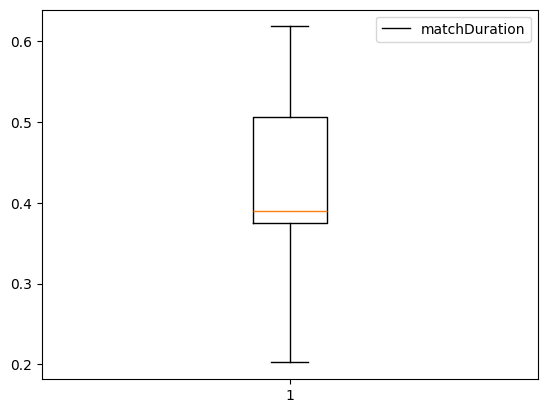

In [65]:
match_types = ["crashfpp", "crashtpp", "duo", "duo-fpp", "flarefpp", 
               "flaretpp", "normal-duo", "normal-duo-fpp", "normal-solo", "normal-solo-fpp",
               "normal-squad", "normal-squad-fpp", "solo", "solo-fpp", "squad", "squad-fpp"]
for type in match_types:
    match_type_data_boxplot(grouped_data = data_grouped_by_game, match_type=type, data_to_boxplot="numGroups")

In [61]:
avgs = compute_avg_of_match_type(data_grouped_by_game)

Averages of "crashfpp" match type are:
matchDuration: 14.87876712328767
numPlayers: 86.12328767123287
numGroups: 42.87671232876713
-------------------------------------------------------------
Averages of "crashtpp" match type are:
matchDuration: 14.913333333333332
numPlayers: 74.2
numGroups: 36.0
-------------------------------------------------------------
Averages of "duo" match type are:
matchDuration: 27.467654946364735
numPlayers: 93.44189511323003
numGroups: 45.38855780691299
-------------------------------------------------------------
Averages of "duo-fpp" match type are:
matchDuration: 26.335990269930978
numPlayers: 93.85037664783428
numGroups: 45.80894538606403
-------------------------------------------------------------
Averages of "flarefpp" match type are:
matchDuration: 31.51851851851852
numPlayers: 79.77777777777777
numGroups: 22.22222222222222
-------------------------------------------------------------
Averages of "flaretpp" match type are:
matchDuration: 31.1936781

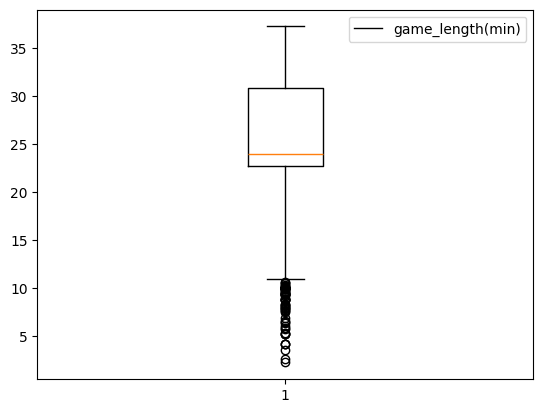

In [ ]:
from matplotlib import pyplot as plt
game_length = []
games = []
for i in range(x.shape[0]):
    game_data = x.iloc[i]
    games.append(i+1)
    game_length.append((game_data['matchDuration'][0])/60)

ax = plt.subplot()


rect = ax.boxplot(game_length)
ax.legend(['game_length(min)'])

plt.savefig("./plots/boxplot_game_length_minutes.png")

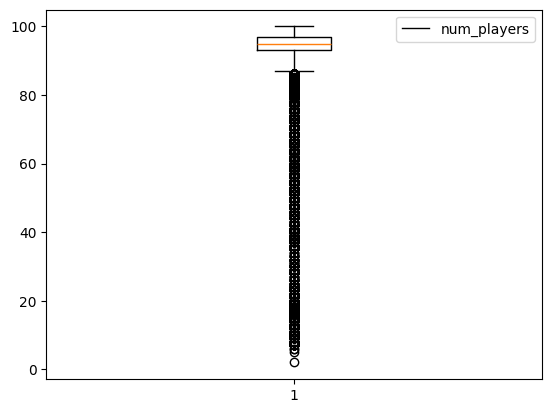

In [15]:
from matplotlib import pyplot as plt
n_players = []
games = []
for i in range(x.shape[0]):
    game_data = x.iloc[i]
    games.append(i+1)
    n_players.append(len(game_data['assists']))

ax = plt.subplot()

rect = ax.boxplot(n_players)
ax.legend(['num_players'])

plt.savefig("./plots/boxplot_num_players_of_games.png")

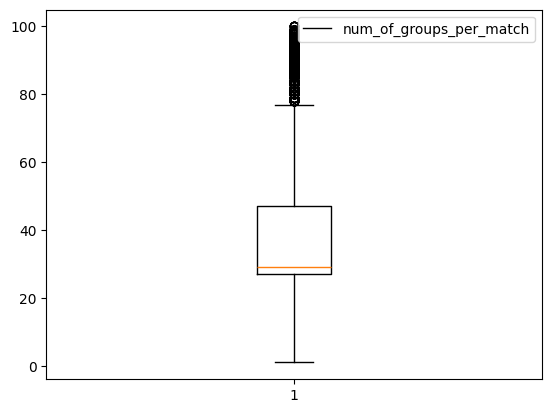

In [16]:
from matplotlib import pyplot as plt
n_groups = []
games = []
for i in range(x.shape[0]):
    game_data = x.iloc[i]
    games.append(i+1)
    group_id_of_current_game = []
    for group_id in game_data["groupId"]:
        if not(group_id in group_id_of_current_game):
            group_id_of_current_game.append(group_id)
    n_groups.append(len(group_id_of_current_game))

ax = plt.subplot()

rect = ax.boxplot(n_groups)
ax.legend(['num_of_groups_per_match'])

plt.savefig("./plots/boxplot_num_groups_of_games.png")

In [136]:

game_length = []
games = []
for i in range(x.shape[0]):
    game_data = x.iloc[i]
    games.append(i+1)
    game_length.append((game_data['matchDuration'][0])/60)

ax = plt.subplot()


rect = ax.bar(x = games, height = game_length, color = "#1f77b4")
ax.legend(['game_length(min)'], loc='center left', bbox_to_anchor=(1, 0.5))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.005*h, '%d'%int(h),
                ha='center', va='bottom')
autolabel(rect)
plt.savefig("./plots/game_length_minutes.png")

: 

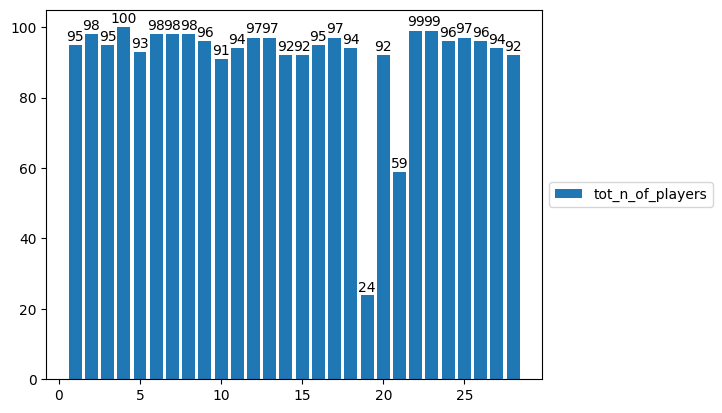

In [116]:
from matplotlib import pyplot as plt
n_players = []
games = []
for i in range(x.shape[0]):
    game_data = x.iloc[i]
    games.append(i+1)
    n_players.append(len(game_data['Id']))

ax = plt.subplot()


rect = ax.bar(x = games, height = n_players, color = "#1f77b4")
ax.legend(['tot_n_of_players'], loc='center left', bbox_to_anchor=(1, 0.5))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.005*h, '%d'%int(h),
                ha='center', va='bottom')
autolabel(rect)
plt.savefig("./plots/num_players_of_games.png")

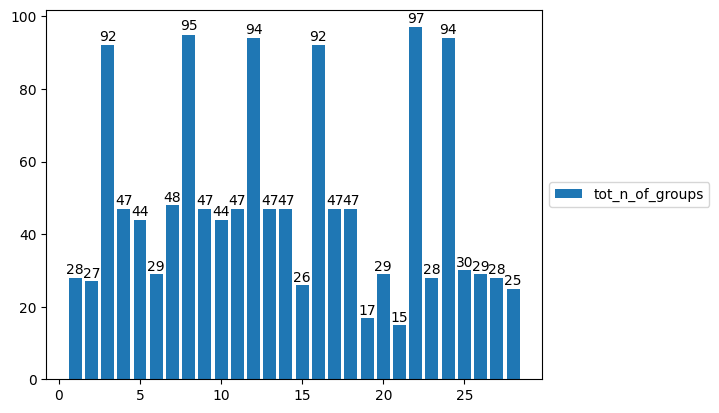

In [105]:
from matplotlib import pyplot as plt
n_groups = []
n_solos = []
games = []
for i in range(x.shape[0]):
    game_data = x.iloc[i]
    games.append(i+1)
    group_id_of_current_game = []
    for group_id in game_data["groupId"]:
        if not(group_id in group_id_of_current_game):
            group_id_of_current_game.append(group_id)
    n_groups.append(len(group_id_of_current_game))
    
ax = plt.subplot()
rect = ax.bar(x = games, height = n_groups, color ='#1f77b4')
ax.legend(['tot_n_of_groups'], loc='center left', bbox_to_anchor=(1, 0.5))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.005*h, '%d'%int(h),
                ha='center', va='bottom')
autolabel(rect)
plt.savefig("./plots/num_groups_of_games.png")

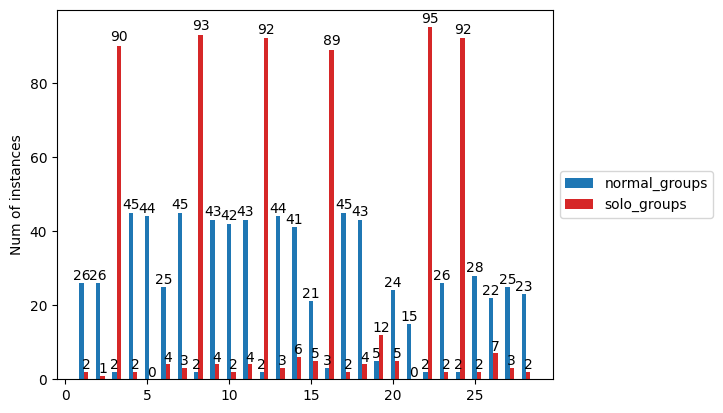

<Figure size 640x480 with 0 Axes>

In [111]:
from matplotlib import pyplot as plt
import numpy as np
n_groups = []
n_solos = []
games = []
for i in range(x.shape[0]):
    game_data = x.iloc[i]
    games.append(i+1)
    group_id_of_current_game = []
    solos_id_of_current_game = []
    for group_id in game_data["groupId"]:
        if not(group_id in solos_id_of_current_game) and not(group_id in group_id_of_current_game):
            solos_id_of_current_game.append(group_id)
        else:
            if group_id in solos_id_of_current_game:
                solos_id_of_current_game.remove(group_id)
                group_id_of_current_game.append(group_id)
    n_groups.append(len(group_id_of_current_game))
    n_solos.append(len(solos_id_of_current_game))
games = np.array(games)
width = 0.27
ax = plt.subplot()

rects1 = ax.bar(x = games, height = n_groups, color ='#1f77b4', width=width, align="center")
rects2 = ax.bar(x = games + width, height = n_solos, color ='#d62728', width=width, align="center")

ax.set_ylabel('Num of instances')
# ax.set_xticks(mult*(games)+ width)
# x_labels = []
# for i,game in enumerate(games):
#     x_labels.append("{}".format(game))
# ax.set_xticklabels( tuple(x_labels) )
ax.legend( (rects1[0], rects2[0]), ('normal_groups', 'solo_groups'), loc='center left', bbox_to_anchor=(1, 0.5))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.005*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

plt.savefig("./plots/num_groups_and_solos_of_games.png")